# Evaluacion de ML

Antes que nada quiero explicarte que este Notebook no está organizado cronológicamente sino que por facetas. A la hora de cambiar variables, volvía a la sección de limpieza de datos y feature engenieering y la hacía ahí. Siento que de esta manera queda todo mas organizado y es mas fácil de seguir.

Abro todos los paquetes aquí arriba para mantenerlos organizados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Cargo Datasets

Cargo los datasets, primero los de diciembre y luego los de enero. Les hago un pd.merge y miro la estructura de los datos.

In [2]:
df_clientes_d = pd.read_csv('clientes_diciembre.csv')
df_consumos_d = pd.read_csv('consumos_diciembre.csv')
df_financiacion_d=pd.read_csv('financiacion_diciembre.csv')
df_productos_d=pd.read_csv('productos_diciembre.csv')

In [3]:
df_diciembre1 = pd.merge(df_clientes_d,df_consumos_d,how='left',on='id')

In [4]:
df_diciembre2 = pd.merge(df_diciembre1,df_financiacion_d,how='left',on='id')

In [5]:
df_diciembre=pd.merge(df_diciembre2,df_productos_d,how='left',on='id')

In [6]:
df_diciembre.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,63,216,11/23/2018 8:48,La Rioja,5,NaN,NaN,110,79,10897,12806,13751,NaN,NaN,NaN,FIBRA,50,tv-futbol
1,2,84,256,8/22/2017 3:19,Vizcaya,3,NaN,NaN,189,89,18657,6499,10862,NaN,NaN,SI,FIBRA,600,tv-futbol
2,3,66,136,12/27/2001 13:50,Albacete,4,NaN,NaN,129,30,15511,17013,16743,NaN,NaN,SI,ADSL,35,tv-futbol
3,4,69,256,8/8/2015 10:53,Lugo,4,NaN,NaN,51,52,12670,3393,6771,NaN,NaN,NaN,FIBRA,200,tv-familiar
4,5,25,22,8/29/1997 2:19,Tarragona,2,2.0,NaN,183,3,23756,18436,4485,NaN,NaN,NaN,ADSL,10,tv-futbol


In [7]:
df_clientes_e = pd.read_csv('clientes_enero.csv')
df_consumos_e = pd.read_csv('consumos_enero.csv')
df_financiacion_e=pd.read_csv('financiacion_enero.csv')
df_productos_e=pd.read_csv('productos_enero.csv')

In [8]:
df_enero1 = pd.merge(df_clientes_e,df_consumos_e,how='left',on='id')

In [9]:
df_enero2 = pd.merge(df_enero1,df_financiacion_e,how='left',on='id')

In [10]:
df_enero=pd.merge(df_enero2,df_productos_e,how='left',on='id')

In [11]:
df_enero.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,63,216,11/23/2018 8:48,La Rioja,5,NaN,NaN,95,19,6525,7634,18520,NaN,NaN,NaN,FIBRA,50,tv-futbol
1,2,84,256,8/22/2017 3:19,Vizcaya,3,NaN,NaN,44,36,14471,14541,8016,NaN,NaN,SI,FIBRA,600,tv-futbol
2,3,66,136,12/27/2001 13:50,Albacete,4,NaN,NaN,94,27,1428,5248,7106,NaN,NaN,SI,ADSL,35,tv-futbol
3,4,69,256,8/8/2015 10:53,Lugo,4,NaN,NaN,186,20,20083,7372,5052,NaN,NaN,NaN,FIBRA,200,tv-familiar
4,6,51,99,11/4/1997 11:43,Huelva,4,NaN,NaN,37,32,19078,5009,8686,NaN,NaN,NaN,FIBRA,200,tv-futbol


In [12]:
df_diciembre.shape

(95467, 19)

In [13]:
df_enero.shape

(92711, 19)

In [14]:
df_diciembre.dtypes

id                  int64
edad                int64
facturacion         int64
antiguedad         object
provincia          object
num_lineas          int64
num_dt            float64
incidencia         object
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
financiacion       object
imp_financ        float64
descuentos         object
conexion           object
vel_conexion        int64
TV                 object
dtype: object

In [15]:
df_diciembre.isnull().sum()

id                    0
edad                  0
facturacion           0
antiguedad            0
provincia             0
num_lineas            0
num_dt            88950
incidencia        90235
num_llamad_ent        0
num_llamad_sal        0
mb_datos              0
seg_llamad_ent        0
seg_llamad_sal        0
financiacion      89095
imp_financ        89095
descuentos        76313
conexion              0
vel_conexion          0
TV                    0
dtype: int64

In [16]:
df_enero.isnull().sum()

id                    0
edad                  0
facturacion           0
antiguedad            0
provincia             0
num_lineas            0
num_dt            90097
incidencia        90720
num_llamad_ent        0
num_llamad_sal        0
mb_datos              0
seg_llamad_ent        0
seg_llamad_sal        0
financiacion      86045
imp_financ        86045
descuentos        72673
conexion              0
vel_conexion          0
TV                    0
dtype: int64

## Limpieza y Feature Engeneering

Muchos de las variables aportadas tenían valores solo en caso que fueran positivos ('SI'), o que sean valores mayores de 0. El primer paso es rellenar esos NAs con 0 o 'NO'. Luego hago la creación de dummies para variables categóricas con pocas categorias. También separo la variable 'antiguedad' en día, mes, año, hora y minuto. Aplique un LabelEncoder a 'provincias' y a 'vel_conexion'. Creo variables binarias utilizando variables continuas ('num_dt','imp_financ') y categorizo 'edad' con dummies cortando por edades. Finalmente creo un log de 'facturacion'.

In [17]:
df_diciembre['num_dt'] = pd.to_numeric((df_diciembre['num_dt'].fillna(0)), downcast='integer')
df_enero['num_dt'] = pd.to_numeric((df_enero['num_dt'].fillna(0)), downcast='integer')

In [18]:
df_diciembre['imp_financ'] = df_diciembre['imp_financ'].fillna(0)
df_diciembre['incidencia'] = df_diciembre['incidencia'].fillna('NO')
df_diciembre['financiacion'] = df_diciembre['financiacion'].fillna('NO')
df_diciembre['descuentos'] = df_diciembre['descuentos'].fillna('NO')
df_enero['imp_financ'] = df_enero['imp_financ'].fillna(0)
df_enero['incidencia'] = df_enero['incidencia'].fillna('NO')
df_enero['financiacion'] = df_enero['financiacion'].fillna('NO')
df_enero['descuentos'] = df_enero['descuentos'].fillna('NO')

In [19]:
df_diciembre['incidencia'] = df_diciembre['incidencia'].map({'SI': 1, 'NO': 0})
df_diciembre['financiacion'] = df_diciembre['financiacion'].map({'SI': 1, 'NO': 0})
df_diciembre['descuentos'] = df_diciembre['descuentos'].map({'SI': 1, 'NO': 0})
df_enero['incidencia'] = df_enero['incidencia'].map({'SI': 1, 'NO': 0})
df_enero['financiacion'] = df_enero['financiacion'].map({'SI': 1, 'NO': 0})
df_enero['descuentos'] = df_enero['descuentos'].map({'SI': 1, 'NO': 0})

In [20]:
tv = pd.get_dummies(df_diciembre['TV'])
tv2 = pd.get_dummies(df_enero['TV'])

In [21]:
df_diciembre.insert(19,'TV_familiar',tv['tv-familiar'])
df_diciembre.insert(20,'TV_futbol',tv['tv-futbol'])
df_diciembre.insert(21,'TV_total',tv['tv-total'])
df_enero.insert(19,'TV_familiar',tv['tv-familiar'])
df_enero.insert(20,'TV_futbol',tv['tv-futbol'])
df_enero.insert(21,'TV_total',tv['tv-total'])

In [22]:
df_diciembre.drop('TV', axis=1, inplace=True)

df_enero.drop('TV', axis=1, inplace=True)

In [23]:
conexion = pd.get_dummies(df_diciembre['conexion'])
conexion2 = pd.get_dummies(df_enero['conexion'])

In [24]:
df_diciembre.insert(21,'ADSL',conexion['ADSL'])
df_diciembre.insert(22,'FIBRA',conexion['FIBRA'])

df_enero.insert(21,'ADSL',conexion['ADSL'])
df_enero.insert(22,'FIBRA',conexion['FIBRA'])

In [25]:
df_diciembre.drop('conexion', axis=1, inplace=True)

df_enero.drop('conexion', axis=1, inplace=True)

In [26]:
df_diciembre['Fecha']=[d.split(' ')[0] for d in df_diciembre.antiguedad]
df_diciembre['Tiempo']=[d.split(' ')[1] for d in df_diciembre.antiguedad]

df_diciembre['Mes']=[d.split('/')[0] for d in df_diciembre.Fecha]
df_diciembre['Dia']=[d.split('/')[1] for d in df_diciembre.Fecha]
df_diciembre['Anio']=[d.split('/')[2] for d in df_diciembre.Fecha]
df_diciembre['Hora']=[d.split(':')[0] for d in df_diciembre.Tiempo]
df_diciembre['Minuto']=[d.split(':')[1] for d in df_diciembre.Tiempo]

df_enero['Fecha']=[d.split(' ')[0] for d in df_enero.antiguedad]
df_enero['Tiempo']=[d.split(' ')[1] for d in df_enero.antiguedad]

df_enero['Mes']=[d.split('/')[0] for d in df_enero.Fecha]
df_enero['Dia']=[d.split('/')[1] for d in df_enero.Fecha]
df_enero['Anio']=[d.split('/')[2] for d in df_enero.Fecha]
df_enero['Hora']=[d.split(':')[0] for d in df_enero.Tiempo]
df_enero['Minuto']=[d.split(':')[1] for d in df_enero.Tiempo]

In [27]:
df_diciembre['Mes'] = df_diciembre['Mes'].astype(int)
df_diciembre['Dia'] = df_diciembre['Dia'].astype(int)
df_diciembre['Anio'] = df_diciembre['Anio'].astype(int)
df_diciembre['Hora'] = df_diciembre['Hora'].astype(int)
df_diciembre['Minuto'] = df_diciembre['Minuto'].astype(int)

df_enero['Mes'] = df_enero['Mes'].astype(int)
df_enero['Dia'] = df_enero['Dia'].astype(int)
df_enero['Anio'] = df_enero['Anio'].astype(int)
df_enero['Hora'] = df_enero['Hora'].astype(int)
df_enero['Minuto'] = df_enero['Minuto'].astype(int)

In [28]:
df_diciembre.drop('antiguedad', axis=1, inplace=True)
df_diciembre.drop('Fecha', axis=1, inplace=True)
df_diciembre.drop('Tiempo', axis=1, inplace=True)

df_enero.drop('antiguedad', axis=1, inplace=True)
df_enero.drop('Fecha', axis=1, inplace=True)
df_enero.drop('Tiempo', axis=1, inplace=True)

In [29]:
df_diciembre.head()

,id,edad,facturacion,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,...,TV_familiar,TV_futbol,TV_total,ADSL,FIBRA,Mes,Dia,Anio,Hora,Minuto
0,1,63,216,La Rioja,5,0,0,110,79,10897,...,0,1,0,0,1,11,23,2018,8,48
1,2,84,256,Vizcaya,3,0,0,189,89,18657,...,0,1,0,0,1,8,22,2017,3,19
2,3,66,136,Albacete,4,0,0,129,30,15511,...,0,1,0,1,0,12,27,2001,13,50
3,4,69,256,Lugo,4,0,0,51,52,12670,...,1,0,0,0,1,8,8,2015,10,53
4,5,25,22,Tarragona,2,2,0,183,3,23756,...,0,1,0,1,0,8,29,1997,2,19


In [30]:
le = LabelEncoder()
df_diciembre['provincia'] = le.fit_transform(df_diciembre['provincia'])
df_enero['provincia'] = le.fit_transform(df_enero['provincia'])
df_diciembre['vel_conexion'] = le.fit_transform(df_diciembre['vel_conexion'])
df_enero['vel_conexion'] = le.fit_transform(df_enero['vel_conexion'])

In [31]:
df_diciembre['num_dt_bin'] = df_diciembre['num_dt'].map({0:0,1 : 1, 2: 1, 3:1,4:1})
df_enero['num_dt_bin'] = df_enero['num_dt'].map({0:0,1 : 1, 2: 1, 3:1,4:1})

In [32]:
df_diciembre['imp_financ_bin'] = df_diciembre['imp_financ'].apply(lambda x: 1 if x<=1 else 0)
df_enero['imp_financ_bin'] = df_enero['imp_financ'].apply(lambda x: 1 if x<=1 else 0)

In [33]:
df_diciembre['log_facturacion'] = np.log(df_diciembre['facturacion'])
df_enero['log_facturacion'] = np.log(df_enero['facturacion'])

In [34]:
df_diciembre['edad_joven'] = df_diciembre['edad'].apply(lambda x: 1 if x<=35 else 0)
df_diciembre['edad_adulto'] = df_diciembre['edad'].apply(lambda x: 1 if x>35 & x<60 else 0)
df_diciembre['edad_jubilado'] = df_diciembre['edad'].apply(lambda x: 1 if x>60 else 0)
df_diciembre['edad_new'] = df_diciembre['edad'].apply(lambda x: 0 if x<=35 else (1 if x>35 and x<60 else(2)))

df_enero['edad_joven'] = df_enero['edad'].apply(lambda x: 1 if x<=35 else 0)
df_enero['edad_adulto'] = df_enero['edad'].apply(lambda x: 1 if x>35 & x<60 else 0)
df_enero['edad_jubilado'] = df_enero['edad'].apply(lambda x: 1 if x>60 else 0)
df_enero['edad_new'] = df_enero['edad'].apply(lambda x: 0 if x<=35 else (1 if x>35 and x<60 else(2)))

### Creo variable target: 'riesgo'

La variable target la llamo 'riesgo'. Es 1 si el cliente esta en riesgo de ser perdido y 0 si no. Se construyo creando una copia de 'id' en enero y llamándola 'riesgo', y luego haciendo un merge con diciembre. Los NA (clientes que no están en enero) son categorizados como 1 y los otros como 0.

In [35]:
df_enero3 = df_enero.copy()
df_enero3['riesgo'] = df_enero3['id']

In [36]:
df_enero3.drop(df_enero3.iloc[:,1:33], axis=1, inplace=True)
df_diciembre = pd.merge(df_diciembre,df_enero3,how='left', on='id')
df_diciembre['riesgo'] = df_diciembre['riesgo'].apply(lambda x: 0 if not pd.isnull(x) else np.nan)
df_diciembre['riesgo'] = df_diciembre['riesgo'].fillna(1)
df_diciembre['riesgo'] = pd.to_numeric((df_diciembre['riesgo']), downcast='integer')

Debajo hago histogramas para cada variable numerica (todas las variables fueron convertidas a numericas). Veo que las variables con mayor correlacion con la variable 'riesgo' son 'num_dt_bin', 'num_dt', 'incidencia' y 'descuentos'.

In [37]:
df_diciembre.dtypes

id                   int64
edad                 int64
facturacion          int64
provincia            int32
num_lineas           int64
num_dt                int8
incidencia           int64
num_llamad_ent       int64
num_llamad_sal       int64
mb_datos             int64
seg_llamad_ent       int64
seg_llamad_sal       int64
financiacion         int64
imp_financ         float64
descuentos           int64
vel_conexion         int64
TV_familiar          uint8
TV_futbol            uint8
TV_total             uint8
ADSL                 uint8
FIBRA                uint8
Mes                  int32
Dia                  int32
Anio                 int32
Hora                 int32
Minuto               int32
num_dt_bin           int64
imp_financ_bin       int64
log_facturacion    float64
edad_joven           int64
edad_adulto          int64
edad_jubilado        int64
edad_new             int64
riesgo                int8
dtype: object

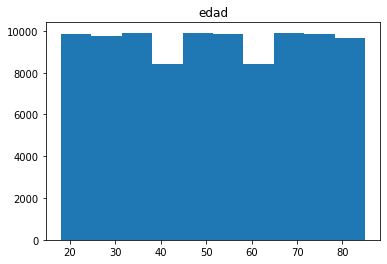

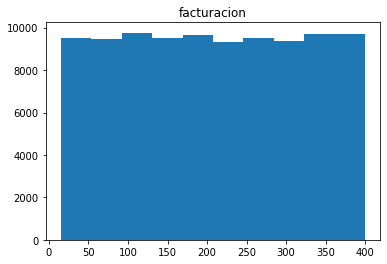

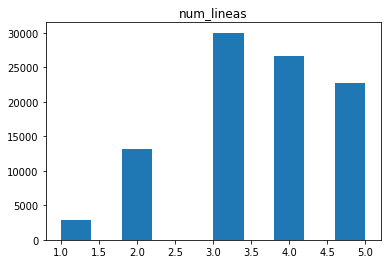

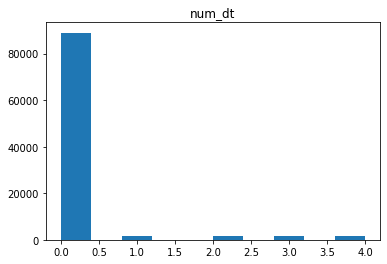

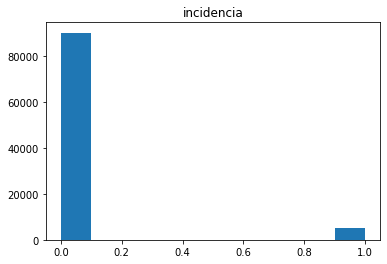

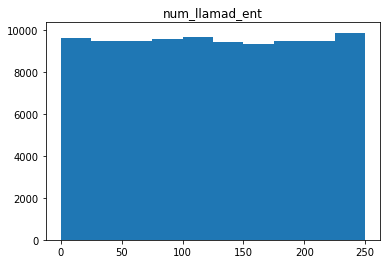

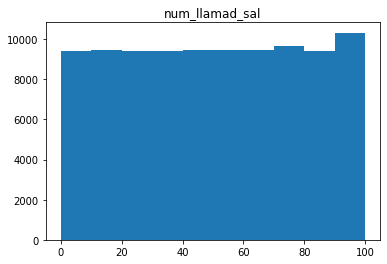

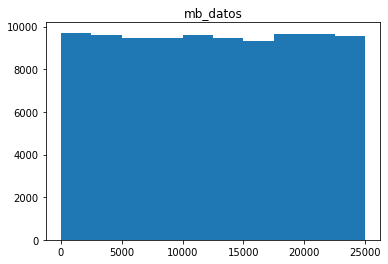

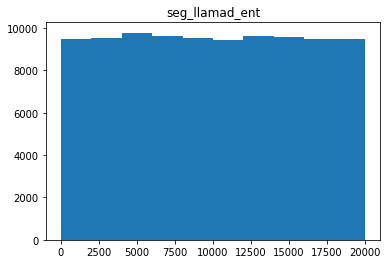

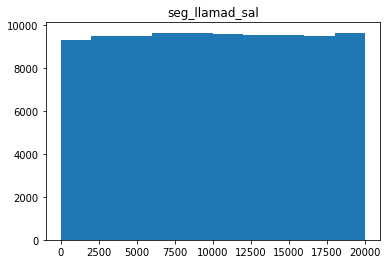

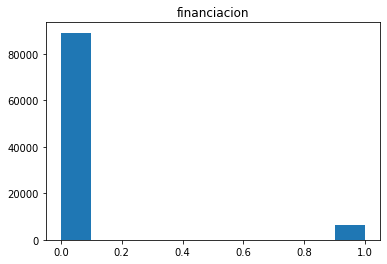

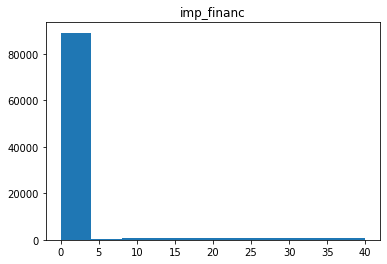

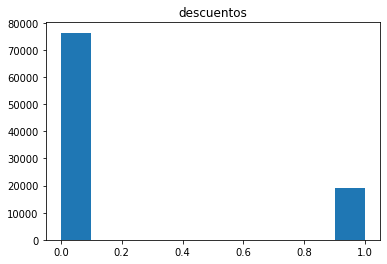

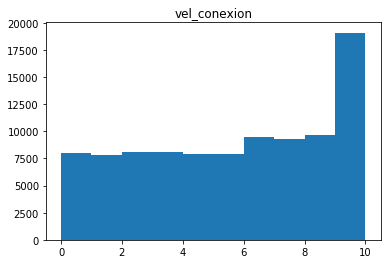

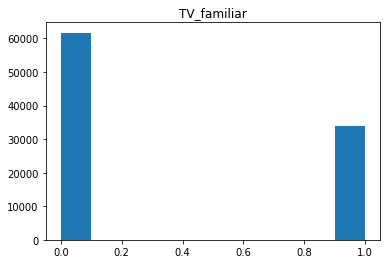

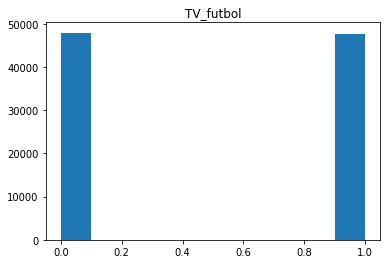

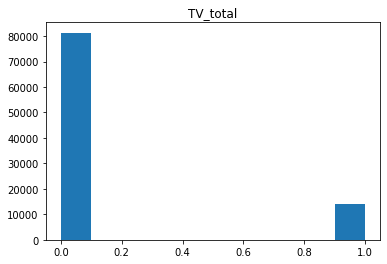

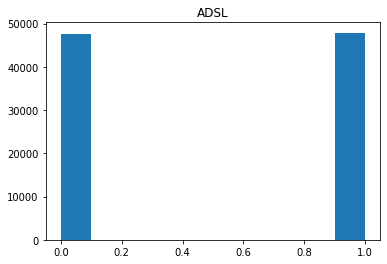

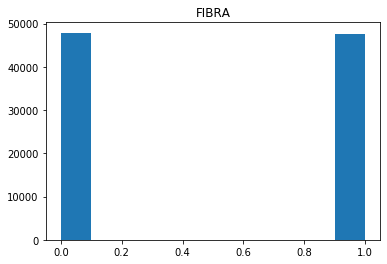

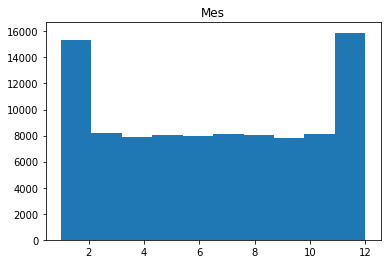

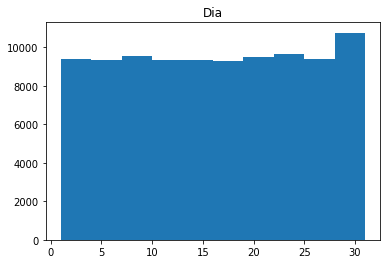

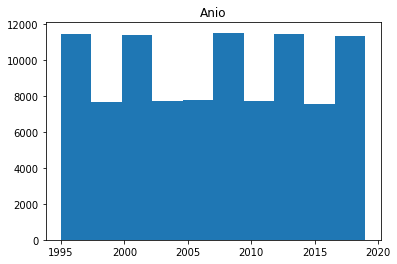

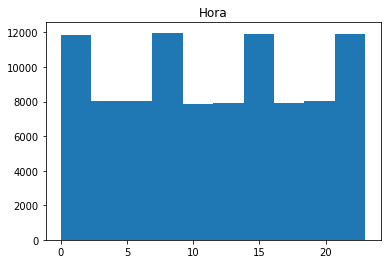

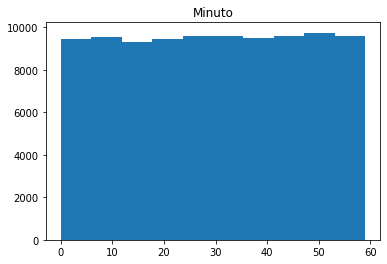

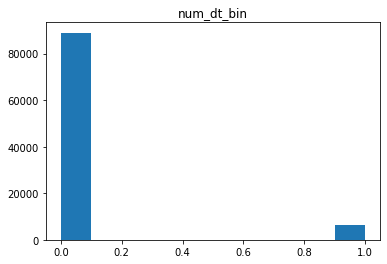

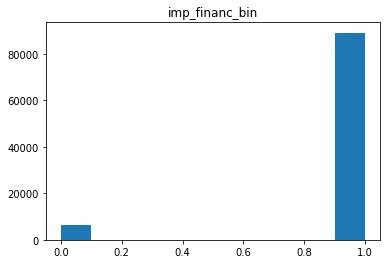

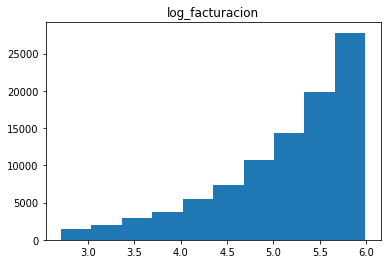

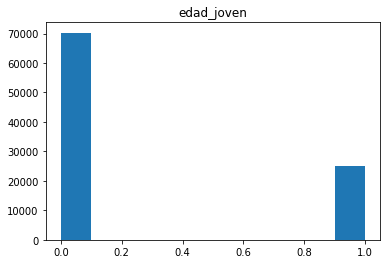

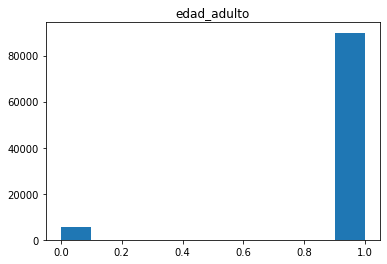

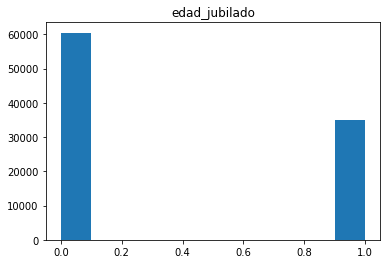

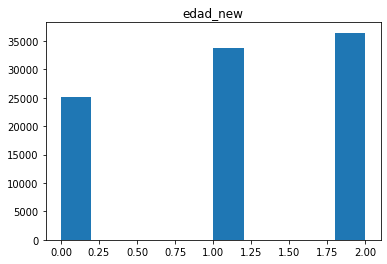

In [38]:
lista_numericas = ['edad','facturacion','num_lineas','num_dt',
                   'incidencia','num_llamad_ent','num_llamad_sal',
                   'mb_datos','seg_llamad_ent','seg_llamad_sal',
                   'financiacion','imp_financ','descuentos',
                   'vel_conexion','TV_familiar','TV_futbol',
                   'TV_total','ADSL','FIBRA','Mes','Dia','Anio',
                   'Hora','Minuto', 'num_dt_bin', 'imp_financ_bin', 
                   'log_facturacion', 'edad_joven', 'edad_adulto', 
                   'edad_jubilado', 'edad_new']

for l in lista_numericas:
    plt.hist(df_diciembre[l])
    plt.title(l)
    plt.show()

In [39]:
corr = abs(df_diciembre.corr())
corr[['riesgo']].sort_values(by = 'riesgo',ascending = False).style.background_gradient()

,riesgo
riesgo,1
num_dt_bin,0.560509
num_dt,0.504867
incidencia,0.500885
descuentos,0.141447
imp_financ_bin,0.0745972
financiacion,0.0745972
imp_financ,0.0676261
provincia,0.00630453
num_llamad_ent,0.00612962


Debajo comparamos cada variable a la variable target.

In [40]:
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['Riesgo'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['Riesgo']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['Riesgo'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()        
    
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='Riesgo',data=proporcion_filtered, fit_reg=True,ci=None)

C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figure

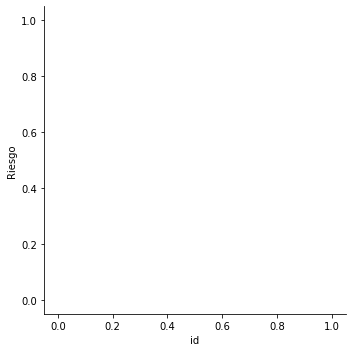

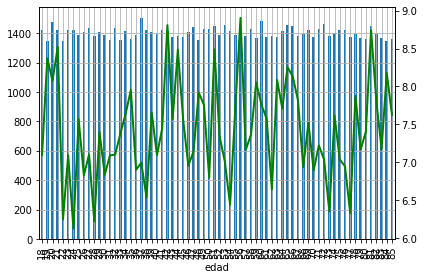

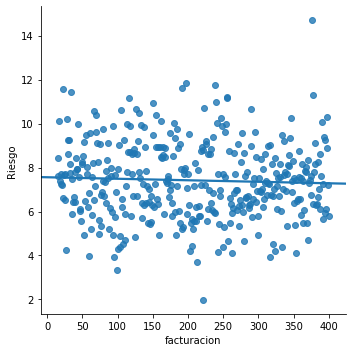

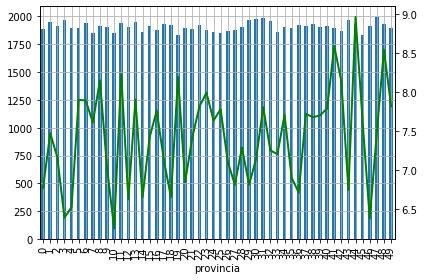

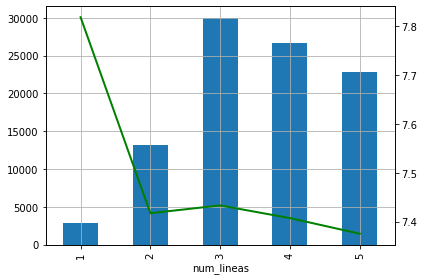

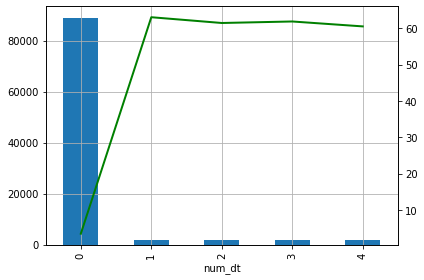

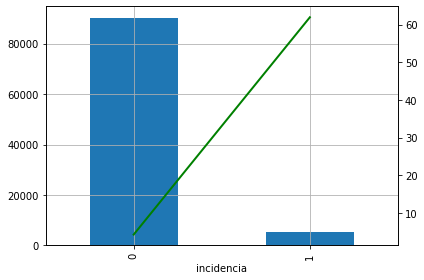

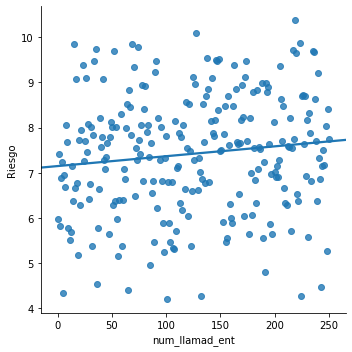

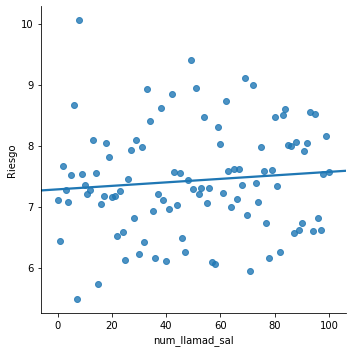

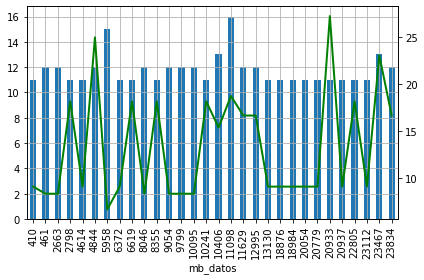

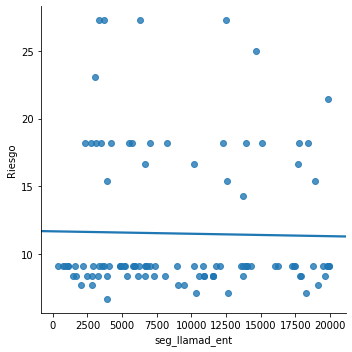

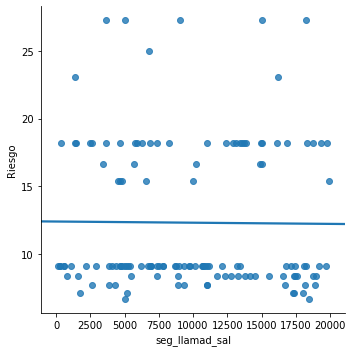

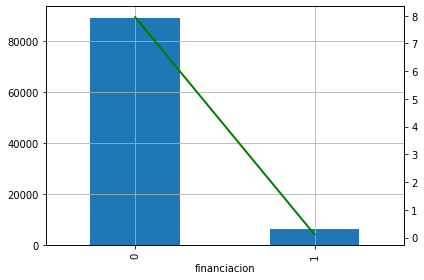

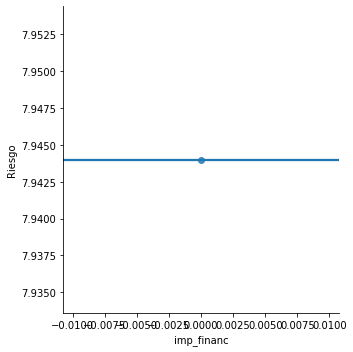

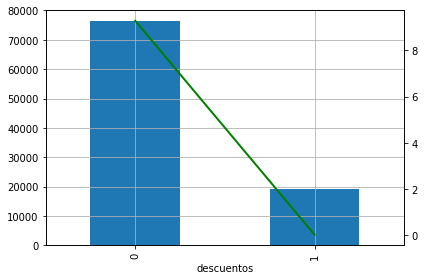

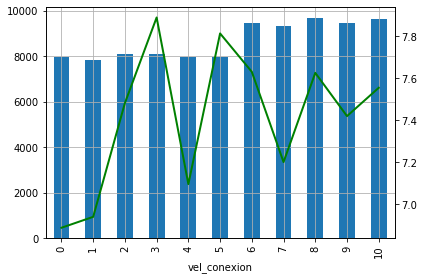

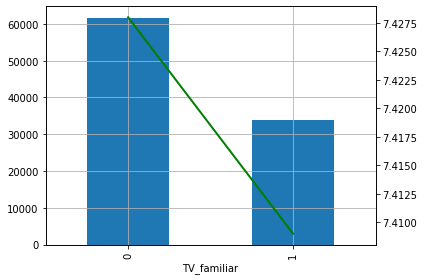

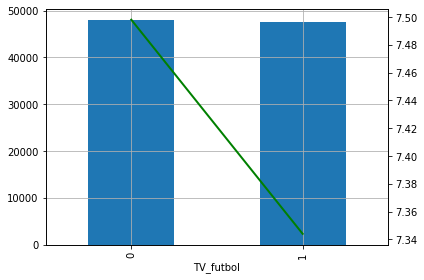

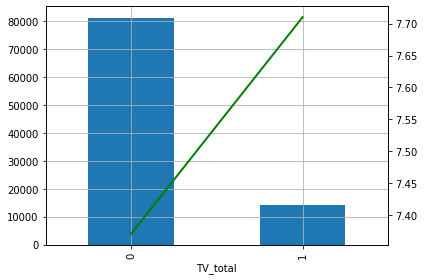

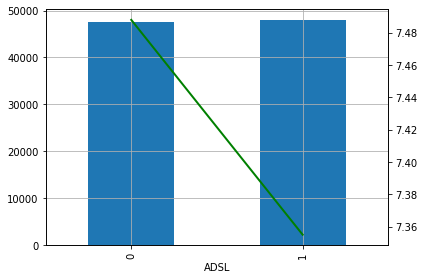

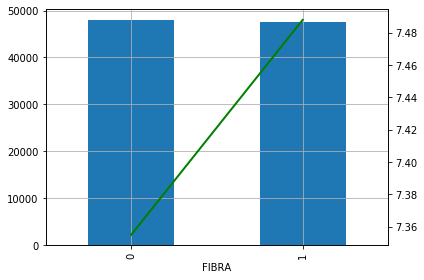

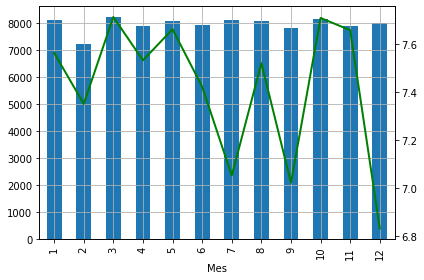

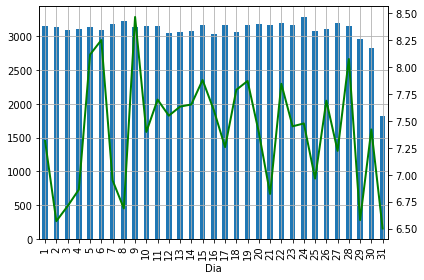

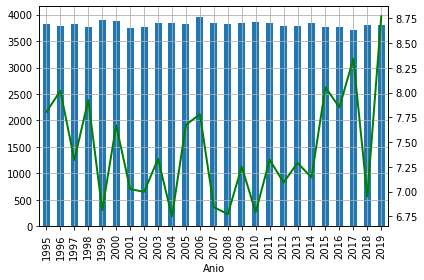

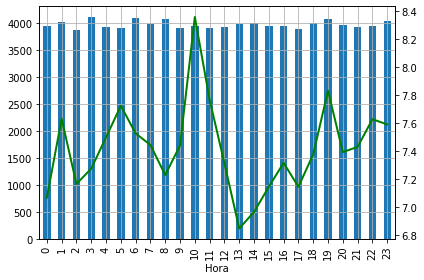

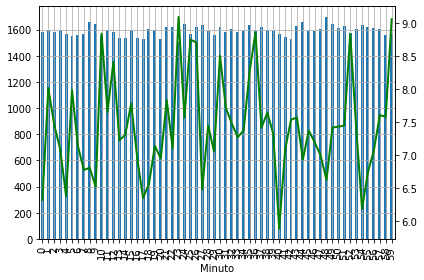

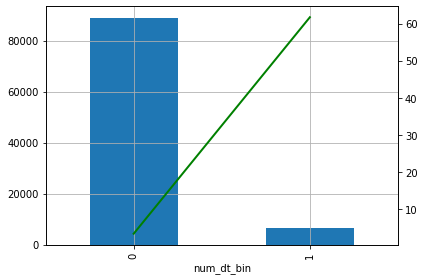

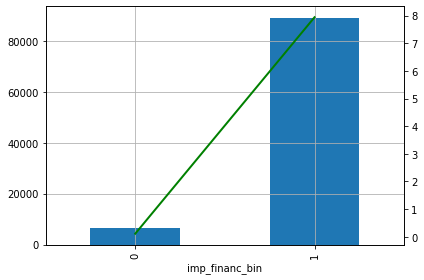

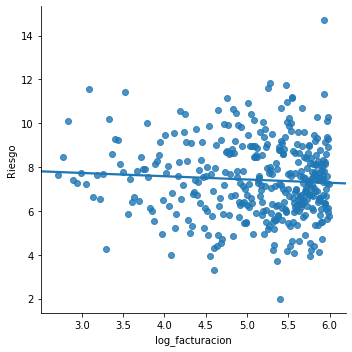

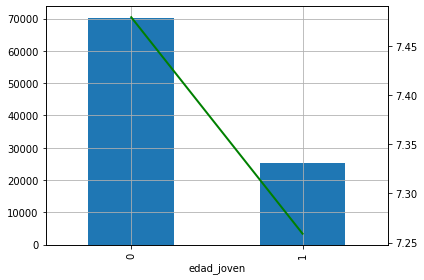

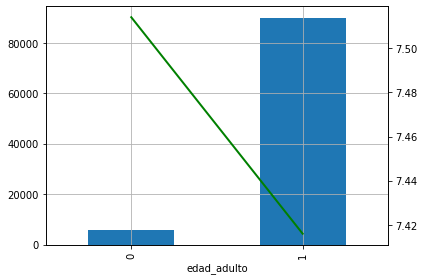

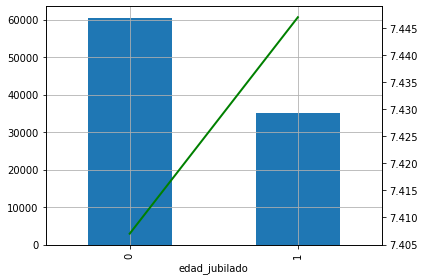

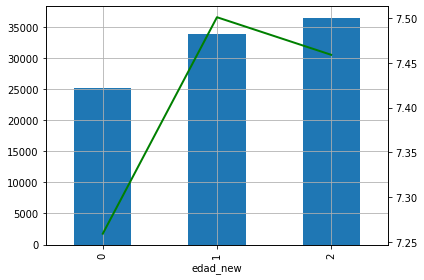

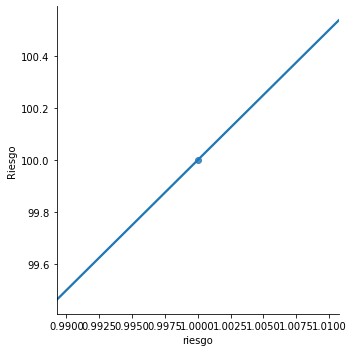

In [41]:
for i in df_diciembre.columns:
    proporciones_final (i, 'riesgo', df_diciembre)

In [42]:
riesgo_diciembre = df_diciembre['riesgo']
df_diciembre.drop('riesgo', axis=1, inplace=True)

## Regresion Logistica

Probamos la primera regresión logística con todo incluido. Usamos un train del 70%. Originalmente no incluía las variables cambiadas por feature engeneering y el auc era un pelín mas bajo. De todas maneras entendía desde el comienzo que modelos de regresión logística no iban a dar los mejores resultados.

In [43]:
X_train0, X_test0, y_train0, y_test0 = train_test_split( df_diciembre,
                                                    riesgo_diciembre,
                                                    test_size=0.3,
                                                    random_state=3453,
                                                    stratify = riesgo_diciembre)

In [44]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

In [45]:
classifier = LogisticRegression().fit(X_train0, y_train0)
y_pred0     = classifier.predict(X_test0)

C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Originalmente un AUC de .61, una precisión super baja y un recall abismal. Para mejorar intentamos transformar algunas variables como 'antiguedad', creamos dummies de 'TV' y 'conexion', LabelEncoder, etc. Ahora subió a .63 pero sigue flojo.

matriz de confusión
[[26210   305]
 [ 1539   587]]
accuracy
0.9356167731573618
precision
0.6580717488789237
recall
0.27610536218250237
f1
0.38899933730947645
AUC
0.6323012196543287


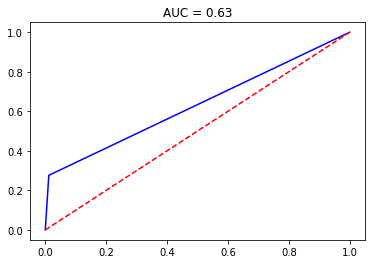

In [46]:
saca_metricas(y_test0, y_pred0)

In [47]:
pkl_filename0 = "modelo1.pkl"
with open(pkl_filename0, 'wb') as file:
    pickle.dump(classifier, file)

# Load from file
with open(pkl_filename0, 'rb') as file:
    pickle_model0 = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model0.score(X_test0, y_test0)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model0.predict(X_test0)

Test score: 93.56 %


## Seleccion de variables y otra regresion logistica

Probemos ya con todas las variables transformadas vía feature engeneering encontrar la mejor selección usando chi squared. Luego las transformamos estandarizándolas y creamos un nuevo DataFrame con estas variables seleccionadas y estandarizadas.

In [48]:
S_chi5 = SelectKBest(chi2, k = 20)
X_chi5 = S_chi5.fit_transform(df_diciembre, riesgo_diciembre)

variables = list(np.asarray(list(df_diciembre))[S_chi5.get_support()])
variables.sort()
print(variables)

['Mes', 'Minuto', 'TV_total', 'descuentos', 'edad', 'facturacion', 'financiacion', 'id', 'imp_financ', 'imp_financ_bin', 'incidencia', 'mb_datos', 'num_dt', 'num_dt_bin', 'num_llamad_ent', 'num_llamad_sal', 'provincia', 'seg_llamad_ent', 'seg_llamad_sal', 'vel_conexion']


In [49]:
columnas = list(variables)
df_diciembre_sv= df_diciembre[columnas]
df_enero_sv= df_enero[columnas]

In [50]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_diciembre_sv,
                                                    riesgo_diciembre,
                                                    test_size=0.3,
                                                    random_state=4567,
                                                    stratify = riesgo_diciembre)

In [51]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [52]:
classifier1 = LogisticRegression().fit(X_train1, y_train1)
y_pred1     = classifier1.predict(X_test1)

C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Probamos con las nuevas variables y esta mejor pero no tanto. Mejor ir a por lo grande y tirar un XGBoost.

matriz de confusión
[[26115   400]
 [ 1350   776]]
accuracy
0.9388987814671276
precision
0.6598639455782312
recall
0.36500470366886173
f1
0.47001817080557234
AUC
0.6749594515892866


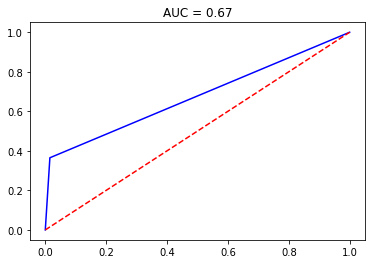

In [53]:
saca_metricas(y_test1, y_pred1)

In [54]:
pkl_filename1 = "modelo2.pkl"
with open(pkl_filename1, 'wb') as file:
    pickle.dump(classifier1, file)

# Load from file
with open(pkl_filename1, 'rb') as file:
    pickle_model1 = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model1.score(X_test1, y_test1)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model1.predict(X_test1)

Test score: 93.89 %


## XGBoost discriminante

Use un gridsearch para encontrar los mejores parámetros (lo cambie a comments porque tarda mucho tiempo en andar) y salió bastante bien aunque no sea del todo realista. AUC de .988, Precisión de .82 y el resto mayor a .90. Para ver si hay overfitting hice un kfold cross-validation. Nos da un accuracy del 98.36% y un sd de .3%! Si solo fuera siempre así.

matriz de confusión
[[26055   460]
 [   10  2116]]
accuracy
0.9835899584511714
precision
0.8214285714285714
recall
0.9952963311382879
f1
0.9000425350914504
AUC
0.988973830287228


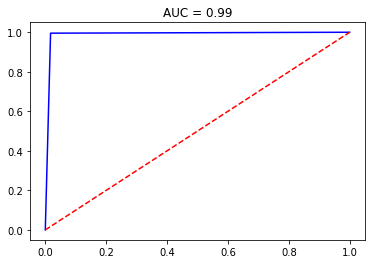

In [55]:
model = XGBClassifier(base_score=0.7, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=567, silent=True, subsample=1, bootstrap = True, criterion = 'gini')
model.fit(X_train1, y_train1)

y_pred2 = model.predict(X_test1)
saca_metricas(y_test1, y_pred2)

In [56]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_test1, y_test1, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 98.36% (0.30%)


In [57]:
#grid_param = {
#    'n_estimators': [100, 300, 500, 800, 1000],
#    'criterion': ['gini', 'entropy'],
#    'bootstrap': [True, False]
#}

In [58]:
#model_grid = GridSearchCV(estimator=model,
#                     param_grid=grid_param,
#                     scoring='accuracy',
#                     cv=5,
#                     n_jobs=-1)

In [59]:
#model_grid.fit(X_train1, y_train1) #ya fueron agregados

In [60]:
#print(model_grid.best_params_) #ya fueron agregados

In [61]:
#print(model_grid.best_score_)

## Random Forest

Lo probé pero da literalmente lo mismo, hasta el mismo accuracy.

matriz de confusión
[[26055   460]
 [   10  2116]]
accuracy
0.9835899584511714
precision
0.8214285714285714
recall
0.9952963311382879
f1
0.9000425350914504
AUC
0.988973830287228


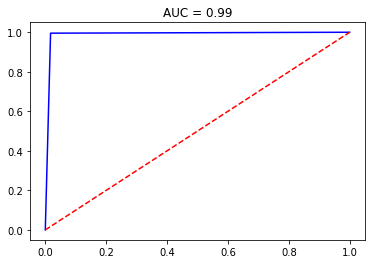

In [62]:
model2 = RandomForestClassifier(max_depth=10, n_estimators = 100)
model2.fit(X_train1, y_train1)

y_pred3 = model2.predict(X_test1)
saca_metricas(y_test1, y_pred3)

In [63]:
results2 = cross_val_score(model2, X_test1, y_test1, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 98.36% (0.30%)


## Conclusion

He decidido utilizar 'model' (XGBoost) como modelo para hacer el test sobre los clientes de enero porque los dos dan exactamente los mismos resultados.

In [89]:
prediccion = model.predict(df_enero_sv)
df_prediccion = pd.DataFrame(prediccion, columns=['prediccion'])
df_final = pd.concat([df_enero, df_prediccion], axis=1)

Vemos que 'model' predice que 1551 clientes van a darse de baja durante este mes. 

In [90]:
df_final['prediccion'].value_counts()

0    91160
1     1551
Name: prediccion, dtype: int64

In [66]:
importances = model.feature_importances_
indices = np.argsort(importances)

C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Text(0.5, 0, 'Relative Importance')

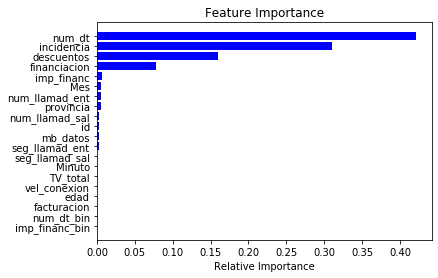

In [67]:
plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train1.columns[[indices]])
plt.xlabel('Relative Importance')

In [98]:
modelo_proba = model.predict_proba(df_enero_sv)[:,1]
modelo_proba = (pd.DataFrame(modelo_proba,columns=['probabilidad'],index=df_enero_sv.index))
modelo_proba.sort_values(by=['probabilidad'],ascending=False,axis=0,inplace=True)

In [99]:
modelo_proba.head()

,probabilidad
14033,0.882456
7040,0.882456
6468,0.880177
6405,0.880177
5368,0.880177


Vemos que las variables 'num_dt', 'incidencia', 'descuentos' y 'financiacion' son las variables relativamente mas importantes a la hora de decidir que clientes se van a marchar. Esto quiere decir que clientes con líneas en impago, clientes con incidencias previas, descuentos o que reciben financiación tienen mayor probabilidad de marcharse a otra operadora.